# A1: Arunima Bollampally
---
## Introduction to Python Programming - DAT-5322 | Summer 1


Dataset:

* A1-dataset-Arunima.csv







## Objective


Prime objective is to predict the salees patterns and extarct insights on understanding customer behaviour and inventory planning



#Section 1: Read and Explore Data

---




###  Load Required Libraries


In [61]:

import pandas as pd     #To read, manipulate, and analyze tabular datasets (DataFrames)
import numpy as np
import matplotlib.pyplot as plt     #To create visualizations using basic plotting tools
import seaborn as sns                #For advanced statistical visualizations with built-in themes and color palettes


print("✅ All libraries loaded and default plotting style have been set.")

✅ All libraries loaded and default plotting style have been set.


###  Read Dataset


In [62]:
# prompt: read the dataset attached with different character encodings if the default doesnot work   (Google, 2024)

import pandas as pd
file_path = 'A1-dataset-Arunima.csv'

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully with default encoding.")
except UnicodeDecodeError:
    print("Default encoding failed. Trying different encodings.")
    encodings_to_try = ['latin-1', 'cp1252', 'utf-16']
    for encoding in encodings_to_try:
        try:
            df = pd.read_csv(file_path, encoding=encoding)
            print(f"Dataset loaded successfully with encoding: {encoding}")
            break # Exit loop if loading is successful
        except UnicodeDecodeError:
            print(f"Encoding {encoding} also failed.")
    if 'df' not in locals():
        print("Failed to load the dataset with tested encodings.")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")

if 'df' in locals():
    # Explore data if loaded successfully
    print("\nDataset Info:")
    df.info()
    print("\nFirst 5 rows:")
    print(df.head())
    print("\nDataset Description:")
    print(df.describe())
else:
    print("\nCannot proceed as the dataset could not be loaded.")


Default encoding failed. Trying different encodings.
Dataset loaded successfully with encoding: latin-1

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87742 entries, 0 to 87741
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    87742 non-null  object 
 1   StockCode    87742 non-null  object 
 2   Description  87462 non-null  object 
 3   Quantity     87742 non-null  int64  
 4   InvoiceDate  87742 non-null  object 
 5   UnitPrice    87742 non-null  float64
 6   CustomerID   55910 non-null  float64
 7   Country      87742 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 5.4+ MB

First 5 rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER  

  # Section 2: Preview of the data sets

## Finding total number of rows and columns

In [63]:
print(df.shape)     # to find the number of total rows and columns

(87742, 8)


## First 5 rows

In [64]:
df.head()    #preview of the first 5 rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Statistical snapshot

In [65]:
df.describe()   #To get a statistical snapshot of the dataset and understanding distribution

,Quantity,UnitPrice,CustomerID
count,87742.000000,87742.000000,55910.000000
mean,8.538761,5.434216,15351.550367
std,358.726762,126.219074,1770.622167
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13871.000000
50%,3.000000,2.510000,15311.000000
75%,8.000000,4.250000,17001.000000
max,74215.000000,16888.020000,18283.000000


## Random 5 rows

In [66]:
df.sample(5)                            # Random 5 rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
56614,541104,22819,"BIRTHDAY CARD, RETRO SPOT",13,1/13/2011 14:29,0.42,NaN,United Kingdom
62635,541509,21868,POTTING SHED TEA MUG,6,1/18/2011 16:31,1.25,13263.0,United Kingdom
78722,542895,22912,YELLOW COAT RACK PARIS FASHION,1,2/1/2011 13:47,4.95,14549.0,United Kingdom
65077,541687,46000S,Dotcom,-300,1/20/2011 15:42,0.00,NaN,United Kingdom
17449,537762,22150,3 STRIPEY MICE FELTCRAFT,6,12/8/2010 12:01,1.95,16558.0,United Kingdom


# Section 3: Data cleaning

## Non-nulls

In [67]:
df.info()   #Finding non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87742 entries, 0 to 87741
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    87742 non-null  object 
 1   StockCode    87742 non-null  object 
 2   Description  87462 non-null  object 
 3   Quantity     87742 non-null  int64  
 4   InvoiceDate  87742 non-null  object 
 5   UnitPrice    87742 non-null  float64
 6   CustomerID   55910 non-null  float64
 7   Country      87742 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 5.4+ MB


## Nulls

In [68]:
# Nulls and data types          #Finding the numbner of null values
print(df.isnull().sum())
print(df.dtypes)


InvoiceNo          0
StockCode          0
Description      280
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     31832
Country            0
dtype: int64
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


## Negative values

In [69]:
# prompt: Check the negative values in num,erical fields and and print how many negative values it contains, if any (Google,2024)

import numpy as np
# Check negative values in numeric columns
print("\nNumber of negative values in numeric columns:")
for col in df.select_dtypes(include=np.number).columns:
  negative_count = (df[col] < 0).sum()
  if negative_count > 0:
    print(f"Column '{col}': {negative_count} negative values")


Number of negative values in numeric columns:
Column 'Quantity': 1822 negative values


## Missing values

In [72]:
# prompt: prompt: Check the missing  values in the columns and and print how many negative values it contains, if any(Google, 2024)

import numpy as np
# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Check negative values in numeric columns
print("\nNumber of negative values in numeric columns:")
for col in df.select_dtypes(include=np.number).columns:
  negative_count = (df[col] < 0).sum()
  if negative_count > 0:
    print(f"Column '{col}': {negative_count} negative values")
  else:
      print(f"Column '{col}': No negative values")

      # Not


Missing values per column:
InvoiceNo          0
StockCode          0
Description        0
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     31552
Country            0
dtype: int64

Number of negative values in numeric columns:
Column 'Quantity': 1654 negative values
Column 'UnitPrice': No negative values
Column 'CustomerID': No negative values


## Removing values

In [71]:
# Removing the 1454 missing value rows of the description as without a decription we can analyse further

df = df.dropna(subset=['Description'])


# Section 4:Exploratory data Analysis

## 10 top best selling items

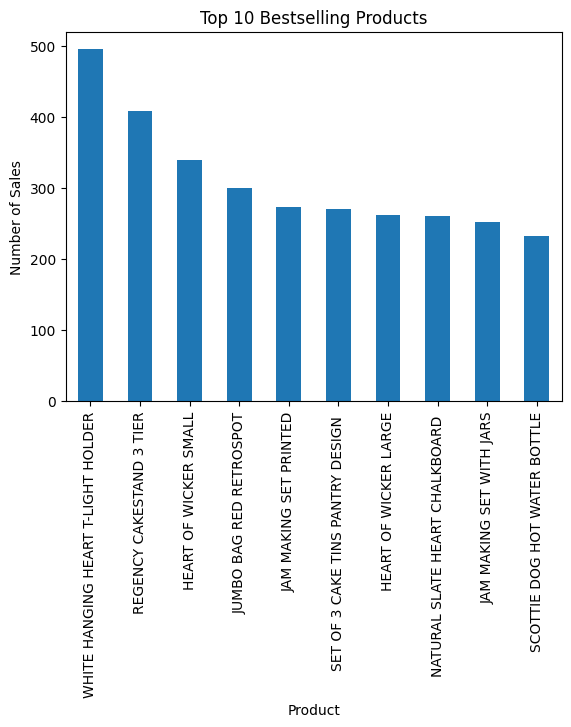

In [73]:
df['Description'].value_counts().head(10).plot(kind='bar')   # Indentifying the top 10 best selling items
plt.title('Top 10 Bestselling Products')
plt.xlabel('Product')
plt.ylabel('Number of Sales')
plt.show()


## Sales by country

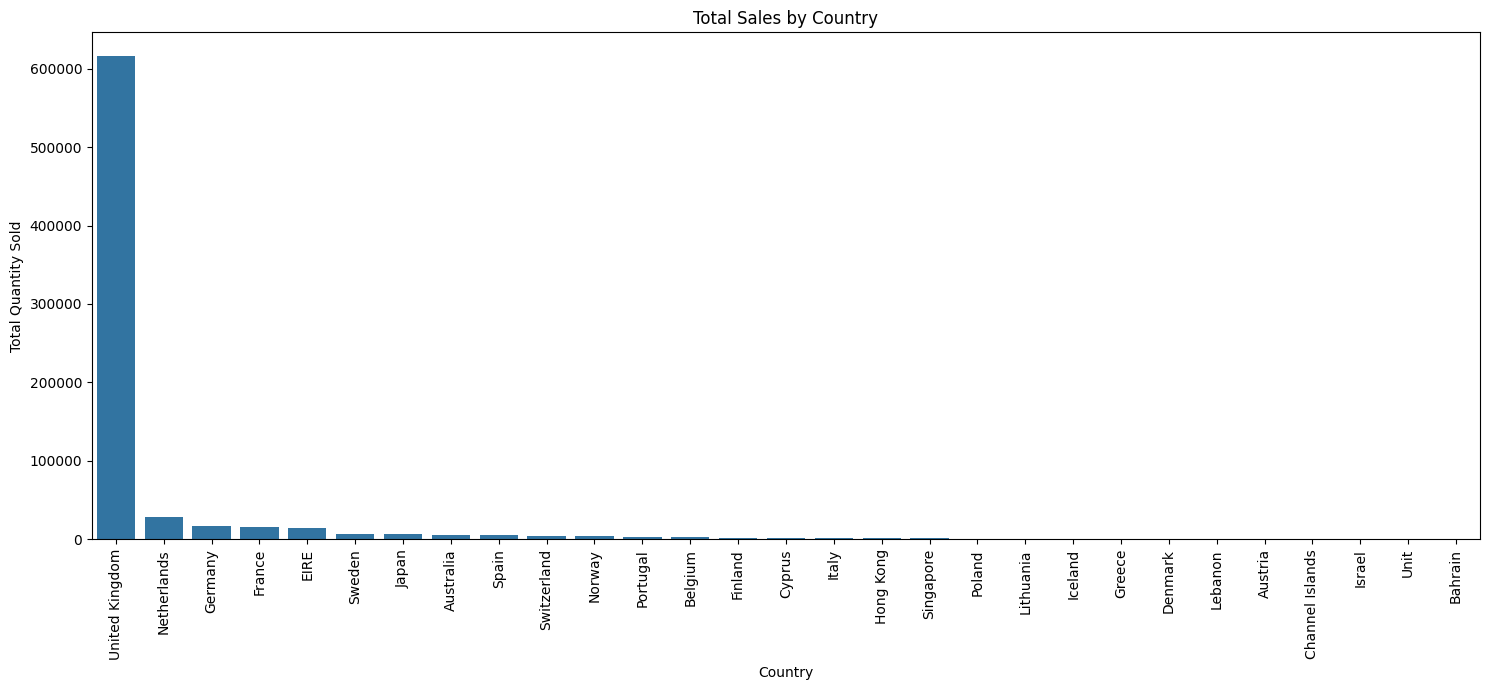

In [74]:
# prompt: give sales by country in chart form  (Google,2024)

import matplotlib.pyplot as plt
# Calculate total sales per country
country_sales = df.groupby('Country')['Quantity'].sum().reset_index()

# Sort by total sales in descending order
country_sales = country_sales.sort_values(by='Quantity', ascending=False)

# Create a bar chart
plt.figure(figsize=(15, 7))
sns.barplot(x='Country', y='Quantity', data=country_sales)
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Price vs Quantity sold

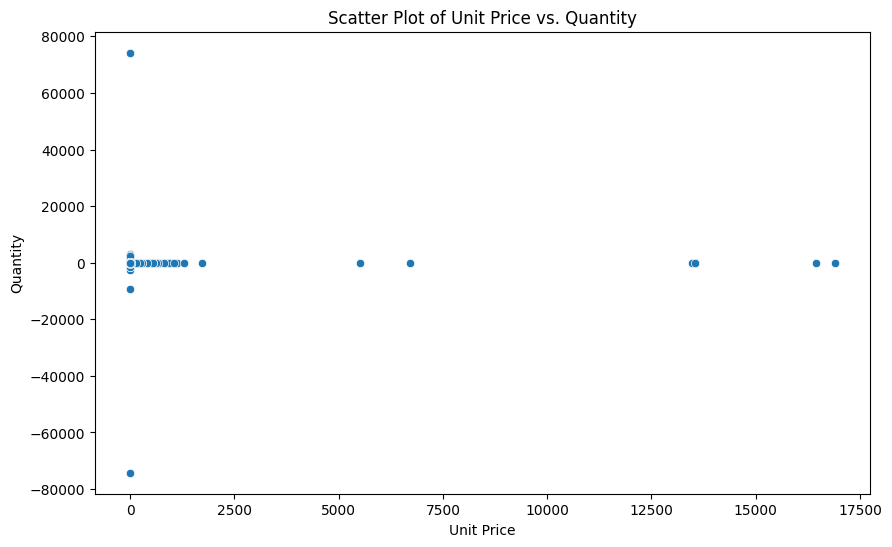

In [75]:
# prompt: draw a scatter plot for unit price and quantity (Google,2024)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UnitPrice', y='Quantity', data=df)
plt.title('Scatter Plot of Unit Price vs. Quantity')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.show()

## Sales Quantity per transaction

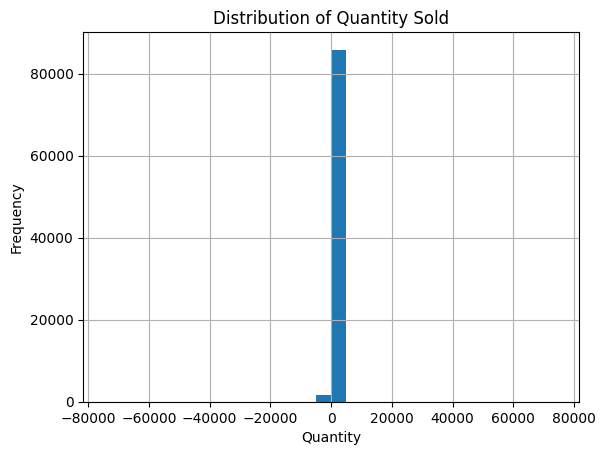

In [76]:
df['Quantity'].hist(bins=30)              # Historgram to know the order sizes
plt.title('Distribution of Quantity Sold')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()


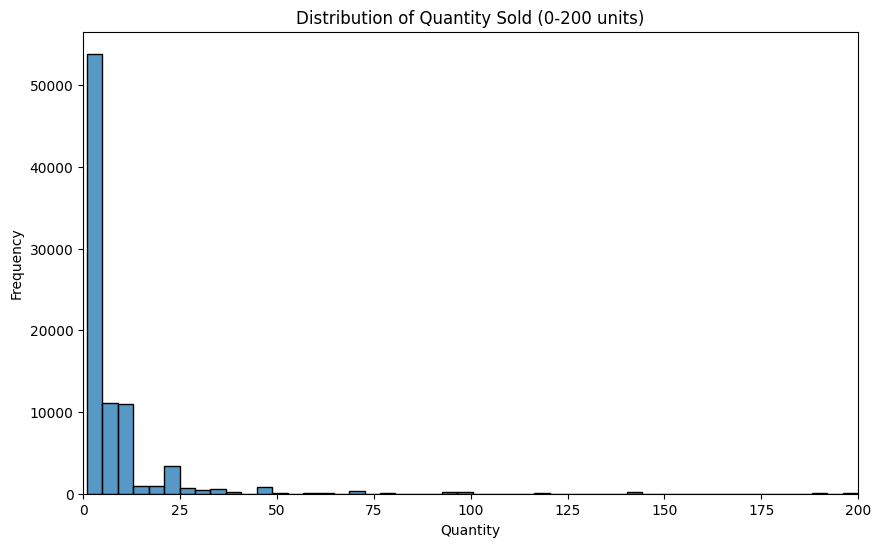

In [77]:
# prompt: plot hostogram for quantity vs frequency  showing values only for quanity 0-200 units (Google,2024)
#to deep dive further into the above histogram
import matplotlib.pyplot as plt
# Filter data for Quantity between 0 and 200
df_filtered = df[(df['Quantity'] >= 0) & (df['Quantity'] <= 200)]

plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x='Quantity', bins=50, kde=False)
plt.title('Distribution of Quantity Sold (0-200 units)')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.xlim(0, 200) # Ensure the x-axis is limited to the desired range
plt.show()

##Seasonality

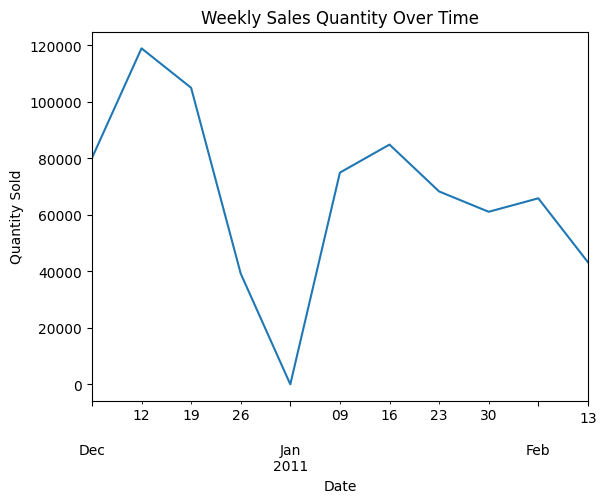

In [78]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.set_index('InvoiceDate').resample('W')['Quantity'].sum().plot()
plt.title('Weekly Sales Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.show()


#Section 5  Analysis



##Data needs to be reframed
As we see there are > 1 K missing product descritpions that needs to be worked upon to have more clear picture of the business.
Also there are around 135 k missing values in Customer Id which if identified can help get more indepth and exact analysis.
The negative price needs to be identified whether its a data entry error or returned item


##  Inventory planning
 1. The histogram chart of Frequency vs quantity helps in planning our inventory specailly for higher priced items.
 The tallest bar of histogram at low quantities show that most customers buy single items. Higher range shows inprecictable demand
 2. Weekly sales quantity over times shows a increasing trens over the year showing inventory needs to be planned accordingly

## Prioritisation of resources:
1.The top sold products and the top selling copuntries help us in identifying key global maekets(UK) and also those countries which have potential to improve
2. The top selling products help us identify bestsellers and improve startegy to leverage them .


## Forecasting:
The time series graph helps us identify the peaks and triughs in purchasing trens and helping in forecasting and aligning inventory with expected sales cycles

Conclusion and Recommendation(s)

Recommendations
•	Inventory Planning: Focus stock on fast-moving, low-quantity items, but keep a buffer for occasional large orders. Investigate and validate extremely high-priced items before reordering.
•	Data Quality: Review and clean UnitPrice outliers (e.g., prices at 0 or 38,970) to ensure accurate reporting and forecasting.
•	Customer Targeting: Encourage more customers to register or provide identification to improve future marketing and retention analysis.
•	Market Focus: Continue prioritizing the UK market, but explore opportunities in other countries if data shows significant sales elsewhere.
•	Product Strategy: Analyze top-selling products and ensure they are always in stock to maximize sales and customer satisfaction.


## 6. References


---

Google. (2024). Google Colab [Computer software]. https://colab.research.google.com/

OpenAI. (2024). ChatGPT [Large language model]. https://chat.openai.com/
